# Plotting income deciles

## Loading some libraries and setting some variables

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
data_folder = './data/income'
data_file = 'Raw_WIDER_data.csv'

In [34]:
TABLEAU_COLORS = {
    'tab:blue': '#1f77b4',
    'tab:orange': '#ff7f0e',
    'tab:green': '#2ca02c',
    'tab:red': '#d62728',
    'tab:purple': '#9467bd',
    'tab:brown': '#8c564b',
    'tab:pink': '#e377c2',
    'tab:gray': '#7f7f7f',
    'tab:olive': '#bcbd22',
    'tab:cyan': '#17becf',
}


## Example of loading data from the WIDER dataset

In [5]:
country = 'Belgium'

In [6]:
dataset = pd.read_csv(os.path.join(data_folder, data_file), index_col='id', encoding='cp1252')

In [7]:
dataset.loc[(dataset['country'] == country)]

,country,c3,iso,c2,year,iso_yr,Unnamed: 7,rural_pop_pct,gini_reported,palma,...,urban_pop,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,staple_demand
id,,,,,,,,,,,,,,,,,,,,,
791,Belgium,BEL,bel,BE,1969,bel1969,Belgium1969,6.293,36.40,1.55,...,8995545,NaN,Low,7,United Nations,United Nations 1981,Tax data,Tax data,NaN,NaN
792,Belgium,BEL,bel,BE,1969,bel1969,Belgium1969,6.293,32.30,1.25,...,8995545,NaN,Low,7,United Nations,United Nations 1981,Tax data,Tax data,NaN,NaN
793,Belgium,BEL,bel,BE,1973,bel1973,Belgium1973,5.767,43.80,NaN,...,1,NaN,Low,5,United Nations,United Nations 1981,Tax data,Tax data,NaN,NaN
794,Belgium,BEL,bel,BE,1975,bel1975,Belgium1975,5.520,41.90,NaN,...,1,NaN,Low,5,United Nations,United Nations 1981,Tax data,Tax data,NaN,NaN
795,Belgium,BEL,bel,BE,1976,bel1976,Belgium1976,5.400,41.60,NaN,...,1,NaN,Low,5,United Nations,United Nations 1981,Tax data,Tax data,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,Belgium,BEL,bel,BE,2015,bel2015,Belgium2015,2.124,27.73,0.98,...,11048175,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,1.258579
893,Belgium,BEL,bel,BE,2016,bel2016,Belgium2016,2.081,26.30,0.90,...,11118122,New 2019,High,13,Eurostat,Eurostat 2019,NaN,European Union Statistics on Income and Living...,https://ec.europa.eu/eurostat/web/income-and-l...,1.297731
894,Belgium,BEL,bel,BE,2016,bel2016,Belgium2016,2.081,26.60,0.92,...,11118122,New 2019,High,12,OECD,OECD 2019,NaN,NaN,http://www.oecd.org/social/income-distribution...,1.297731


## Defining plot and auxiliary functions

### Auxiliary functions

First, we defining a function to provide the sources available for a country per year:

In [10]:
def show_resources_for_country_and_year(country, year):
    sel_dataset = dataset.loc[(dataset['country'] == country)]
    sel_year = sel_dataset.loc[dataset['year'] == year].set_index('source')
    print('details for "'+country+'":\n')
    print(sel_year['resource_detailed'])
    
    

For example, for France in 1993, no resources are available:

In [12]:
show_resources_for_country_and_year('France', 1993)

details for "France":

Series([], Name: resource_detailed, dtype: object)


### Plotting functions

Then we define a function which plots the deciles for a country for a given year:

In [14]:
def plot_country_and_year_deciles(country, year, ax=None, kind='bar', sel_sources=None):
    sel_dataset = dataset.loc[(dataset['country'] == country)]
    sel_year = sel_dataset.loc[dataset['year'] == year].set_index('source')
    print('details for "'+country+'":\n')
    print(sel_year['resource_detailed'])
    print('\n')
    decile = ['d'+str(i) for i in range(1, 11)]
    plot_data = sel_year[['year', 'gini_reported', 'palma'] + decile]
    
    if sel_sources is None:
        ax = plot_data[decile].transpose().plot(ax=ax, kind=kind)
    else:
        print('selected sources:', sel_year['resource'].iloc[sel_sources])
        ax = plot_data[decile].iloc[sel_sources].transpose().plot(ax=ax, kind=kind)
    ax.set_xlabel('deciles')
    ax.set_ylabel('share')
    ax.set_title(sel_year['resource'].iloc[0]+' ('+country+')')
    print('\n')
    return ax

An example for the US in 2004:

details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Income Study               Income, gross
Luxembourg Income Study               Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
OECD                                    Income, net
World Bank                        Income, net/gross
Research study                          Consumption
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object




<Axes: title={'center': 'Income (net) (United States)'}, xlabel='deciles', ylabel='share'>

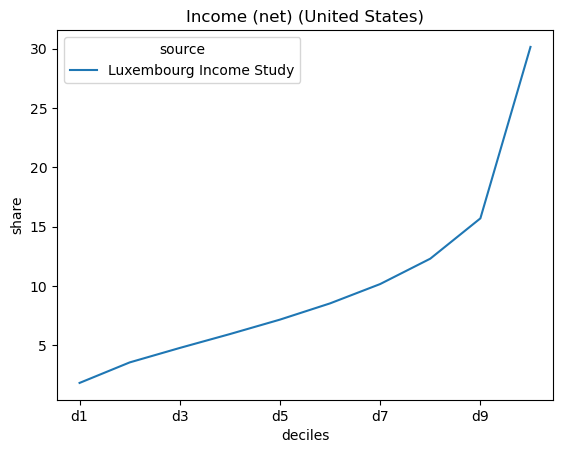

In [15]:
plot_country_and_year_deciles('United States', 2004, kind='line', sel_sources=[0])

and for Belgium the same year:

details for "Belgium":

source
Eurostat            Income, net
OECD                Income, net
OECD              Income, gross
OECD              Market income
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object




<Axes: title={'center': 'Income (net) (Belgium)'}, xlabel='deciles', ylabel='share'>

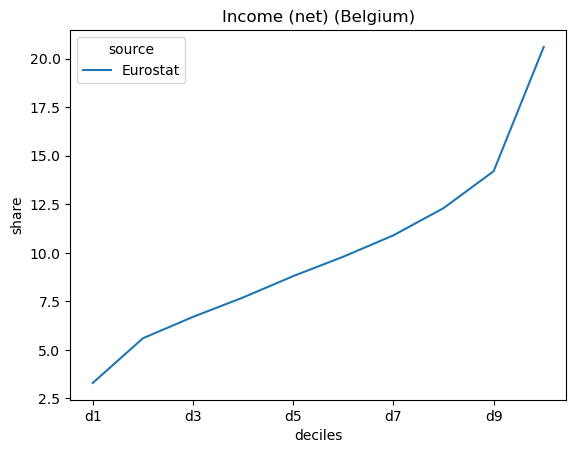

In [16]:
plot_country_and_year_deciles('Belgium', 2004, kind='line', sel_sources=[0])

Next we define a function which plots deciles for many countries for a single year:

In [144]:
def plot_countries_and_year_deciles(countries, year, sel_sources, ax=None, kind='bar'):
    gini = list()
    palma = list()
    decile = ['d'+str(i) for i in range(1, 11)]
    legends = list()
    plotted = False
    for country in countries:
        sel_dataset = dataset.loc[(dataset['country'] == country)]
        sel_year = sel_dataset.loc[dataset['year'] == year].set_index('source')
        print('details for "'+country+'":\n')
        print(sel_year['resource_detailed'])
        print('\n')
        plot_data = sel_year[['year', 'gini_reported', 'palma'] + decile]
        if np.all(np.isnan(plot_data[decile])):
            print('source selected is empty')
            continue

        plotted = True
        print('selected sources:', sel_year['resource'].iloc[sel_sources[country]])
        ax = plot_data[decile].iloc[sel_sources[country]].transpose().plot(ax=ax, kind=kind, label=country)
        palma.append(plot_data['palma'].iloc[sel_sources[country]])
        gini.append(plot_data['gini_reported'].iloc[sel_sources[country]])
        legends.append(f'{country} (gini: {float(gini[-1].iloc[0])}, palma: {float(palma[-1].iloc[0])})')
        title = sel_year['resource'].iloc[0]+' ('+str(year)+')'
        print('\n')
    
    if not plotted:
        return ax
    ax.set_xlabel('deciles')
    ax.set_ylabel('share')
    ax.set_title(title)
    #legends = [ for country, g, p in zip(countries, gini, palma)]
    ax.legend(legends)
    return ax

For example for the US, France and Belgium in 2004:

details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Income Study               Income, gross
Luxembourg Income Study               Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
OECD                                    Income, net
World Bank                        Income, net/gross
Research study                          Consumption
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object


details for "Belgium":

source
Eurostat            Income, net
OECD                Income, net
OECD              Income, gross
OECD              Market income
World Bank    Income, net/gross
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "France":

source
Eurostat     

<Axes: title={'center': 'Income (net) (2004)'}, xlabel='deciles', ylabel='share'>

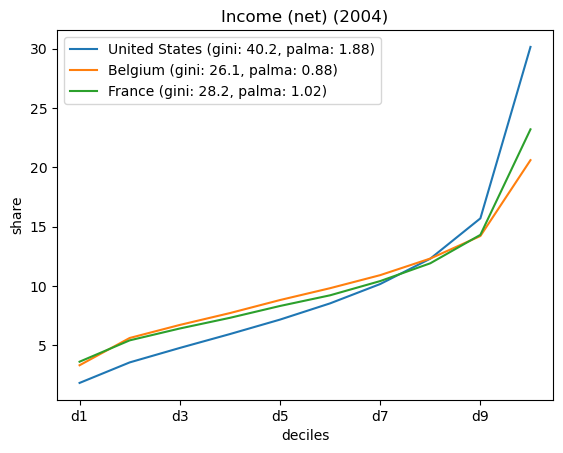

In [133]:
plot_countries_and_year_deciles(['United States', 'Belgium', 'France'], 2004, kind='line', sel_sources={'United States': [0], 'Belgium': [0], 'France': [0]})

and in 2016:

details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Income Study               Income, gross
Luxembourg Income Study               Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
OECD                                    Income, net
World Bank                        Income, net/gross
Research study                          Consumption
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object


details for "Belgium":

source
Eurostat    Income, net
OECD        Income, net
Name: resource_detailed, dtype: object


selected sources: source
Eurostat    Income (net)
Name: resource, dtype: object


details for "France":

source
Eurostat    Income, net
OECD        Income, net
Name: resource_detailed, dtype: object


selected sources: source
Eurostat   

<Axes: title={'center': 'Income (net) (2016)'}, xlabel='deciles', ylabel='share'>

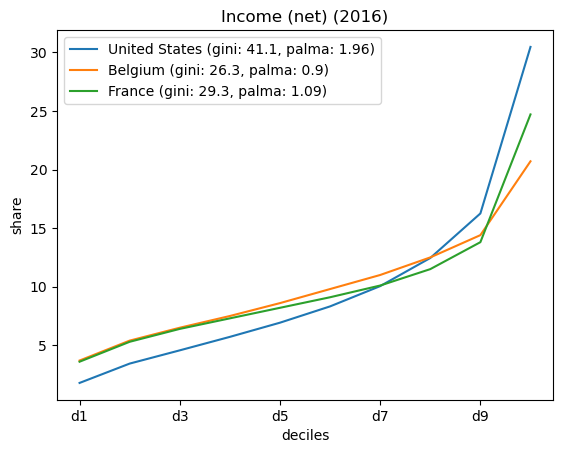

In [134]:
plot_countries_and_year_deciles(['United States', 'Belgium', 'France'], 2016, kind='line', sel_sources={'United States': [0], 'Belgium': [0], 'France': [0]})

Finally, we define a function which plots deciles for several years for a given country:

In [119]:
def plot_country_and_years_deciles(country, years, sel_sources, ax=None, kind='bar', cmap=None):

    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    color_list = list(TABLEAU_COLORS.keys())
    sel_dataset = dataset.loc[(dataset['country'] == country)]
    decile = ['d'+str(i) for i in range(1, 11)]
    legends = list()
    for i, year in enumerate(years):
        if cmap is not None:
            color = cmap(i / len(years))
        else:
            color = color_list[i % len(color_list)]
        sel_year = sel_dataset.loc[dataset['year'] == year].set_index('source')

        if i ==0:
            print('details for "'+country+'":\n')
            print(sel_year['resource_detailed'])
            print('\n')
            if sel_sources is not None:
                print('selected sources:', sel_year['resource'].iloc[sel_sources])
        
        plot_data = sel_year[['year', 'gini_reported', 'palma'] + decile]
        if np.all(np.isnan(plot_data[decile])):
            continue
        try:
            ax = plot_data[decile].iloc[sel_sources].transpose().plot(ax=ax, kind=kind, color=color)
            legends.append(f'{year} (gini: {float(plot_data['gini_reported'].iloc[sel_sources].iloc[0])}, palma: {float(plot_data['palma'].iloc[sel_sources].iloc[0])})')
            title = str(sel_year['resource'].iloc[sel_sources].index[0])+' - '+str(sel_year['resource'].iloc[sel_sources].iloc[0])+' ('+country+')'
        except:
            pass

        
    ax.set_xlabel('deciles')
    ax.set_ylabel('share')
    ax.set_title(title)
    ax.legend(legends)
    return ax

For example for Belgium:

details for "Belgium":

source
National statistical authority    Taxable income, net
Name: resource_detailed, dtype: object


selected sources: source
National statistical authority    Earnings
Name: resource, dtype: object


<Axes: title={'center': 'Eurostat - Income (net) (Belgium)'}, xlabel='deciles', ylabel='share'>

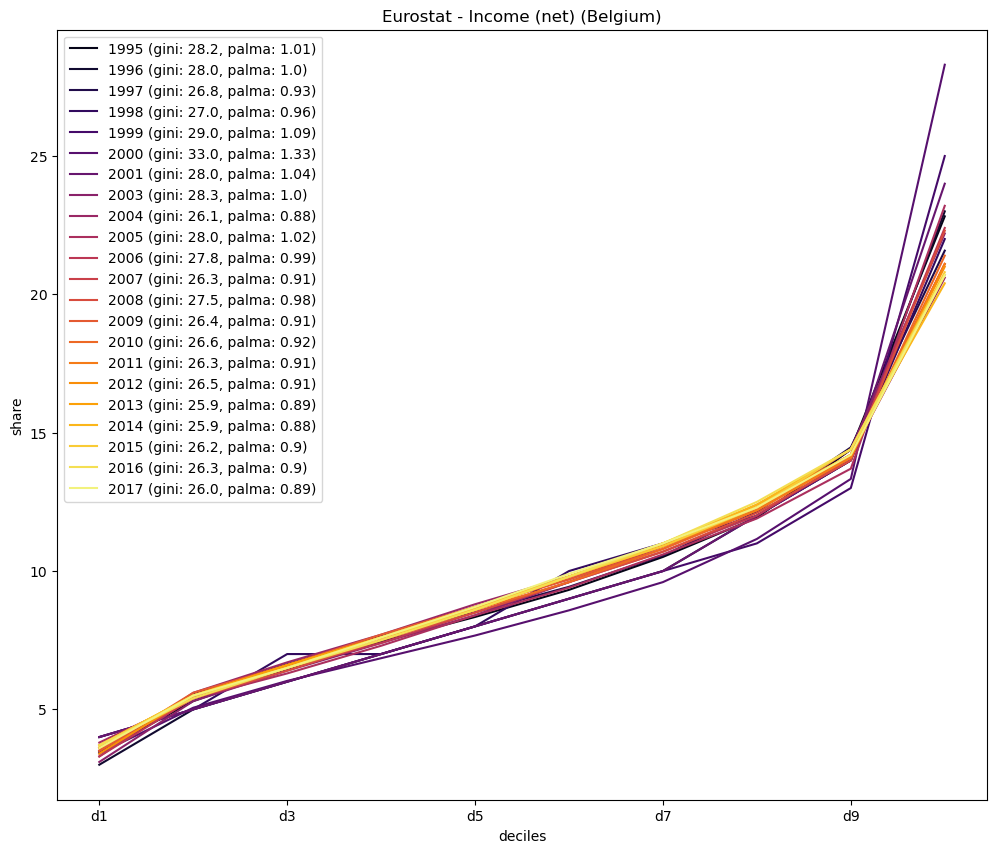

In [148]:
fig, ax = plt.subplots(figsize=(12,10))
plot_country_and_years_deciles('Belgium', list(range(1994,2018)), sel_sources=[0], kind='line', cmap='inferno', ax=ax)

For example for France:

details for "France":

source
Luxembourg Income Study      Income, net
Luxembourg Income Study      Income, net
Luxembourg Income Study    Income, gross
Luxembourg Income Study    Income, gross
Luxembourg Income Study      Consumption
Luxembourg Income Study      Consumption
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object


<Axes: title={'center': 'Eurostat - Income (net) (France)'}, xlabel='deciles', ylabel='share'>

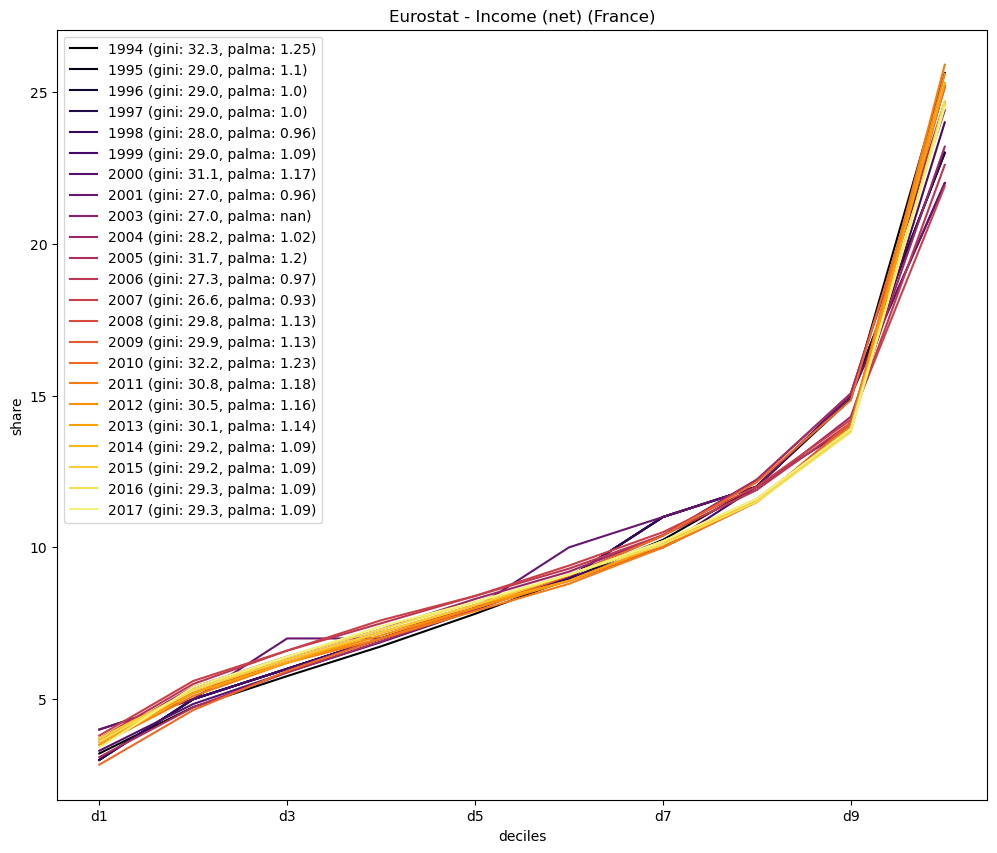

In [147]:
fig, ax = plt.subplots(figsize=(12,10))
plot_country_and_years_deciles('France', list(range(1994,2018)), sel_sources=[0], kind='line', cmap='inferno', ax=ax)

For example for the US:

details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Income Study               Income, gross
Luxembourg Income Study               Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
OECD                                    Income, net
World Bank                        Income, net/gross
Research study                          Income, net
Research study                          Consumption
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object


<Axes: title={'center': 'Luxembourg Income Study - Income (net) (United States)'}, xlabel='deciles', ylabel='share'>

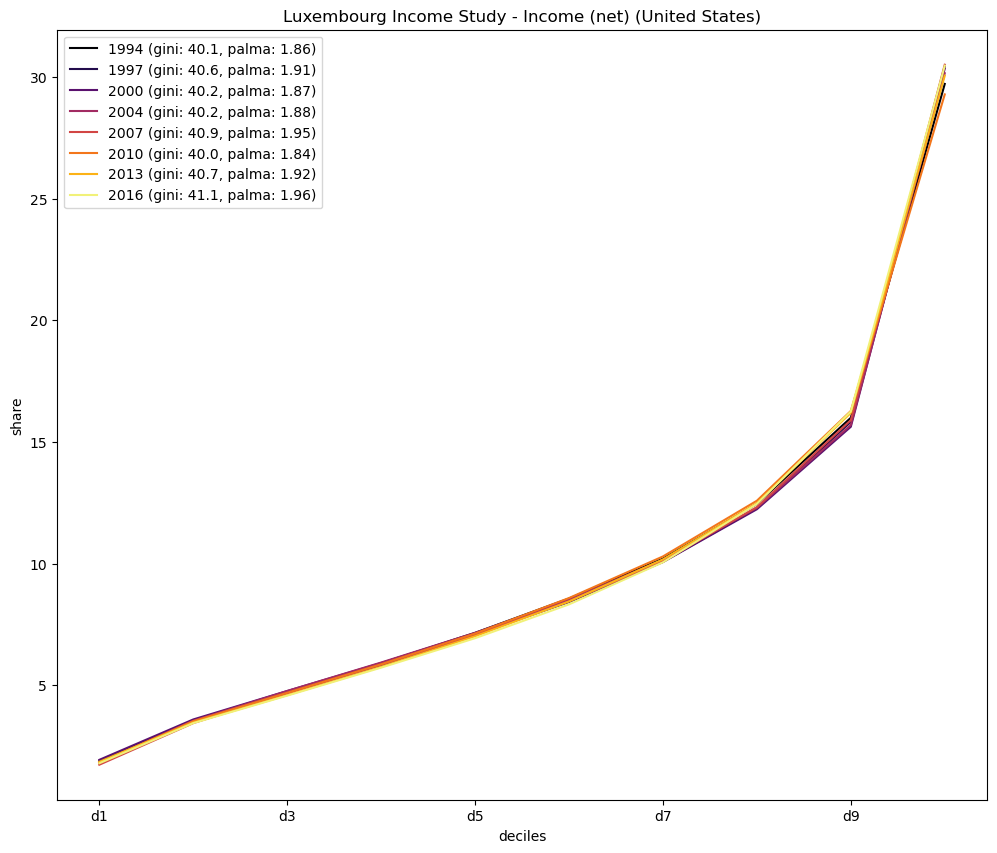

In [146]:
fig, ax = plt.subplots(figsize=(12,10))
plot_country_and_years_deciles('United States', list(range(1994,2017)), sel_sources=[0], kind='line', cmap='inferno', ax=ax)

## Playground

details for "United States":

source
Luxembourg Income Study                 Income, net
Luxembourg Income Study                 Income, net
Luxembourg Income Study               Income, gross
Luxembourg Income Study               Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
National statistical authority        Income, gross
OECD                                    Income, net
World Bank                        Income, net/gross
Research study                          Income, net
Research study                          Consumption
Name: resource_detailed, dtype: object


selected sources: source
Luxembourg Income Study    Income (net)
Name: resource, dtype: object


details for "Belgium":

source
National statistical authority    Taxable income, net
Name: resource_detailed, dtype: object


source selected is empty
details for "France":

source
Luxembourg Income Study      Income, net
Luxembourg Income Study      In

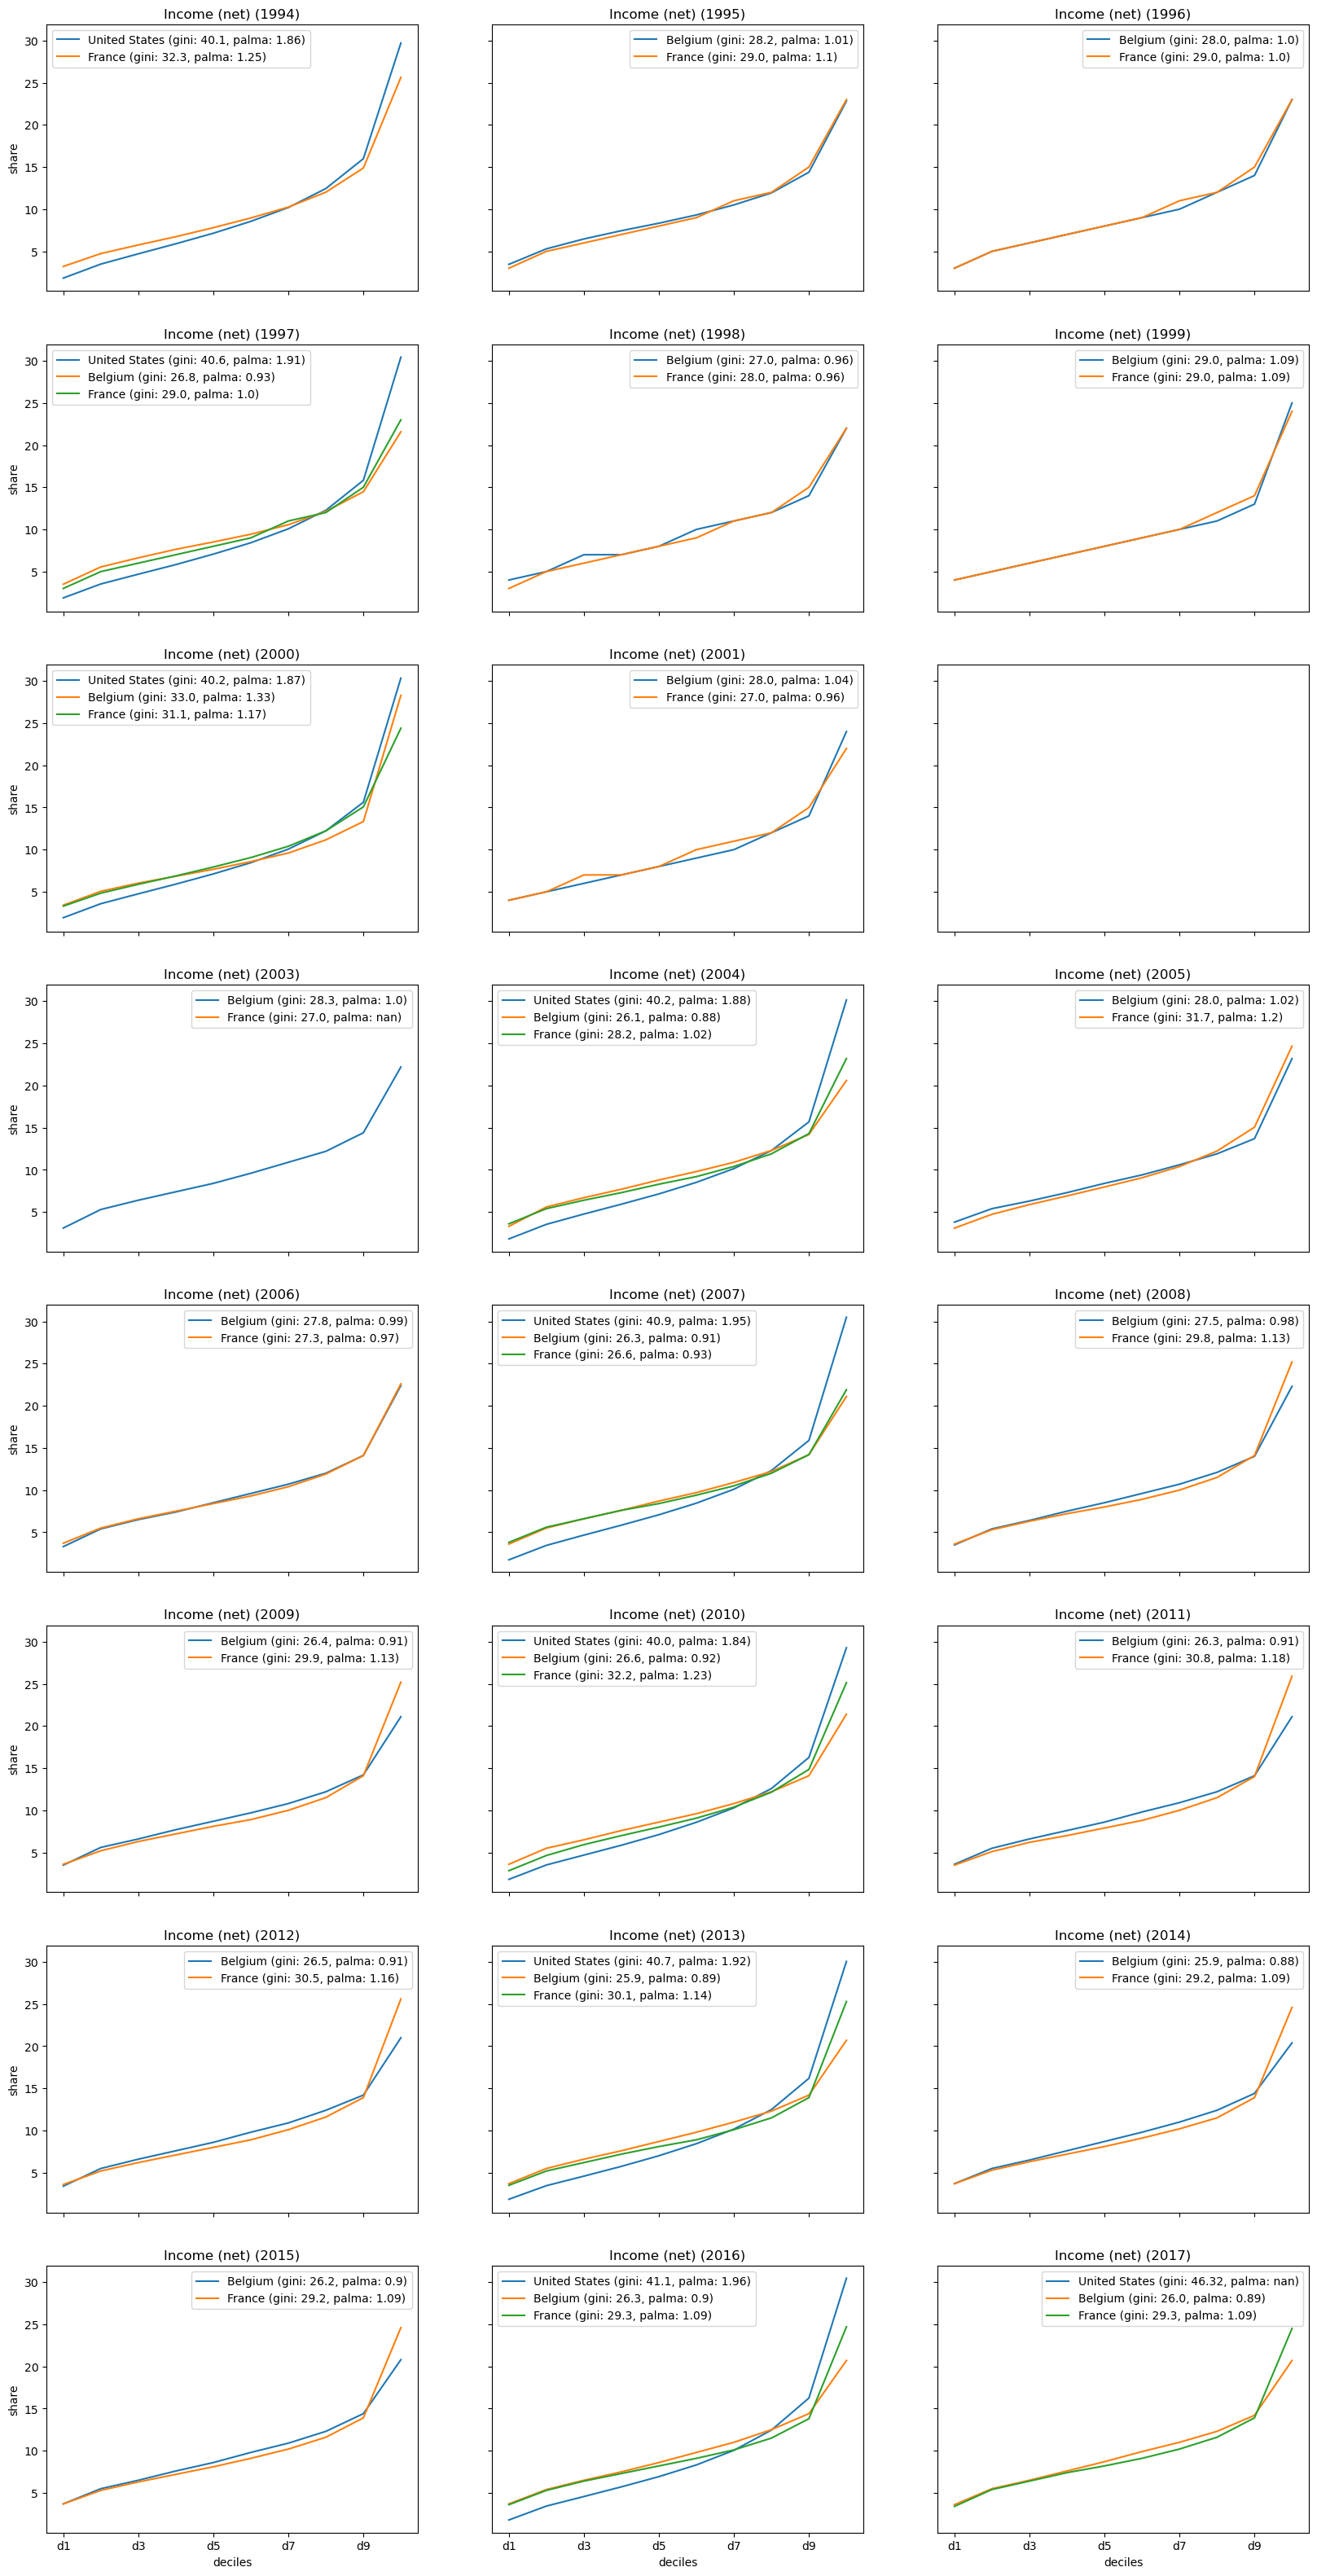

In [149]:
fig, axes = plt.subplots(8,3, figsize=(20,8 * 5), sharex=True, sharey=True)
axs = axes.flatten()
for i, y in enumerate(range(1994,2018)):
    plot_countries_and_year_deciles(['United States', 'Belgium', 'France'], y, kind='line', sel_sources={'United States': [0], 'Belgium': [0], 'France': [0]}, ax=axs[i])